# Supervised methods - Regression

# Supervised learning

Classical machine learning is often divided into two categories – supervised and unsupervised learning.

For the case of supervised learning we act as a "supervisor" or "teacher" for our ML algorithms by providing the algorithm with "labelled data" that contains example answers of what we wish the algorithm to achieve.

For instance, if we wish to train our algorithm to distinguish between images of cats and dogs, we would provide our algorithm with images that have already been labelled as "cat" or "dog" so that it can learn from these examples. If we wished to train our algorithm to predict house prices over time we would provide our algorithm with example data of datetime values that are "labelled" with house prices.

Supervised learning is split up into two further categories: classification and regression. For classification the labelled data is discrete, such as the "cat" or "dog" example, whereas for regression the labelled data is continuous, such as the house price example.

In this episode we will explore how we can use regression to build a "model" that can be used to make predictions.


# Regression

Regression is a statistical technique that relates a dependent variable (a label or target variable in ML terms) to one or more independent variables (features in ML terms). A regression model attempts to describe this relation by fitting the data as closely as possible according to mathematical criteria. This model can then be used to predict new labelled values by inputting the independent variables into it. For example, if we create a house price model we can then feed in any datetime value we wish, and get a new house price value prediction.

Regression can be as simple as drawing a "line of best fit" through data points, known as linear regression, or more complex models such as polynomial regression, and is used routinely around the world in both industry and research. You may have already used regression in the past without knowing that it is also considered a machine learning technique!

![Example of linear and polynomial regressions](https://raw.githubusercontent.com/UW-Madison-DataScience/machine-learning-novice-sklearn/gh-pages/fig//regression_example.png)

## Linear regression using Scikit-Learn

We've had a lot of theory so time to start some actual coding! Let's create a regression model on some penguin data available through the Python plotting library [Seaborn](https://seaborn.pydata.org/). 

Let’s start by loading in and examining the penguin dataset, which containing a few hundred samples and a number of features and labels.

In [3]:
# !pip install seaborn if import fails, run this first
import seaborn as sns

dataset = sns.load_dataset("penguins")
print(dataset.shape)
dataset.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We can see that we have seven columns in total: 4 continuous (numerical) columns named `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`; and 3 discrete (categorical) columns named `species`, `island`, and `sex`. We can also see from a quick inspection of the first 5 samples that we have some missing data in the form of `NaN` values. Missing data is a fairly common occurrence in real-life data, so let's go ahead and remove any rows that contain `NaN` values:

In [5]:
dataset.dropna(inplace=True)
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In this scenario we will train a linear regression model using `body_mass_g` as our feature data and `bill_depth_mm` as our label data. We will train our model on a subset of the data by slicing the first 146 samples of our cleaned data. 

In machine learning we often train our models on a subset of data, for reasons we will explain later in this lesson, so let us extract a subset of data to work on by slicing the first 146 samples of our cleaned data and extracting our feature and label data:

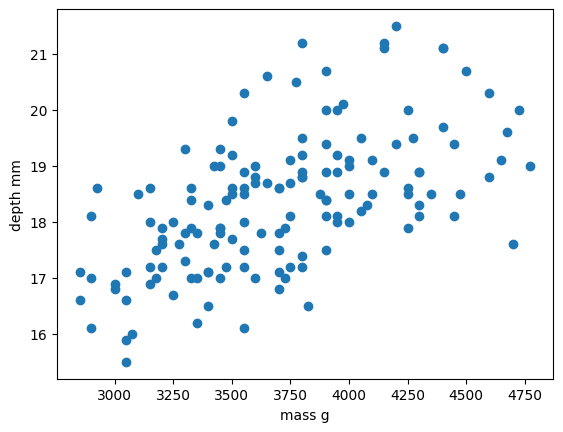

In [7]:
import matplotlib.pyplot as plt

train_data = dataset[:146] # first 146 rows

x_train = train_data["body_mass_g"]
y_train = train_data["bill_depth_mm"]

plt.scatter(x_train, y_train)
plt.xlabel("mass g")
plt.ylabel("depth mm")
plt.show()

In this regression example we will create a Linear Regression model that will try to predict `y` values based upon `x` values.

In machine learning terminology: we will use our `x` feature (variable) and `y` labels(“answers”) to train our Linear Regression model to predict `y` values when provided with `x` values.

The mathematical equation for a linear fit is `y = mx + c` where `y` is our label data, `x` is our input feature(s), `m` represents the slope of the linear fit, and `c` represents the intercept with the y-axis.

A typical ML workflow is as following:

* Decide on a model to use model (also known as an estimator)
* Tweak your data into the required format for your model
* Define and train your model on the input data
* Predict some values using the trained model
* Check the accuracy of the prediction, and visualise the result

We have already decided to use a linear regression model, so we’ll now pre-process our data into a format that Scikit-Learn can use.

Let's check our current x/y types and shapes.

In [9]:
print(type(x_train))
print(type(y_train))
print(x_train.shape)
print(y_train.shape)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(146,)
(146,)


Sklearn requires a 2D array, so lets reshape our 1D arrays from (N) to (N,).

In [11]:
import numpy as np

# sklearn requires a 2D array, so lets reshape our 1D arrays from (N) to (N,).
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)

(146, 1)
(146, 1)


Next we’ll define a model, and train it on the pre-processed data. We’ll also inspect the trained model parameters m and c:

In [13]:
from sklearn.linear_model import LinearRegression

# Define our estimator/model
model = LinearRegression(fit_intercept=True)
                
# train our estimator/model using our data
lin_regress = model.fit(x_train,y_train)

# inspect the trained estimator/model parameters
m = lin_regress.coef_
c = lin_regress.intercept_
print("linear coefs=", m, c)

linear coefs= [[0.00154247]] [12.63062456]


**Quick question:** What are the *trainable parameters/coefs/weights* of this model"? What do they represent?

Now we can make predictions using our trained model, and calculate the Root Mean Squared Error (RMSE) of our predictions. The RMSE allows us to measure average error on the same scale as the target/prediction variable (bill depth in mm).

In [16]:
import math
from sklearn.metrics import mean_squared_error

# Predict some values using our trained estimator/model.
# In this case we predict our input data to evaluate accuracy!
y_train_pred = lin_regress.predict(x_train)

# calculated a RMS error as a quality of fit metric
train_error = math.sqrt(mean_squared_error(y_train, y_train_pred))
print("train RMSE =", train_error)

train RMSE = 0.989750418206048


Finally, we’ll plot our input data, our linear fit, and our predictions:

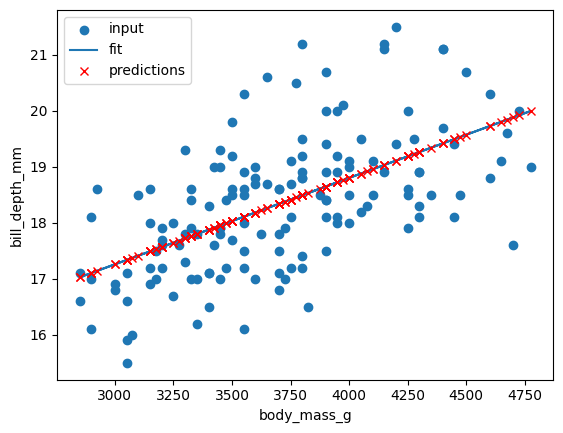

In [18]:
plt.scatter(x_train, y_train, label="input")
plt.plot(x_train, y_train_pred, "-", label="fit")
plt.plot(x_train, y_train_pred, "rx", label="predictions")
plt.xlabel("body_mass_g")
plt.ylabel("bill_depth_mm")
plt.legend()
plt.show()

Congratulations! We've now created our first machine-learning model of the lesson and we can now make predictions of `bill_depth_mm` for any `body_mass_g` values that we pass into our model.

Let's provide the model with all of the penguin samples and see how our model performs on the full dataset:

In [20]:
# Extract remaining observations for testing

test_data = dataset[146:] # row 147 -> end 
x_test = test_data["body_mass_g"] # lowercase x since there is only one predictor
y_test = test_data["bill_depth_mm"] # lowercase y since there is only one target variable

# sklearn requires a 2D array, so lets reshape our 1D arrays from (N) to (N,).
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Predict values using our trained estimator/model from earlier
y_test_pred = lin_regress.predict(x_test)

# calculated a RMSE error for all data
test_error = math.sqrt(mean_squared_error(y_test, y_test_pred))
print("test RMSE =", test_error)

test RMSE = 4.445686601362821


Our RMSE for predictions on all penguin samples is far larger than before, so let's visually inspect the situation:

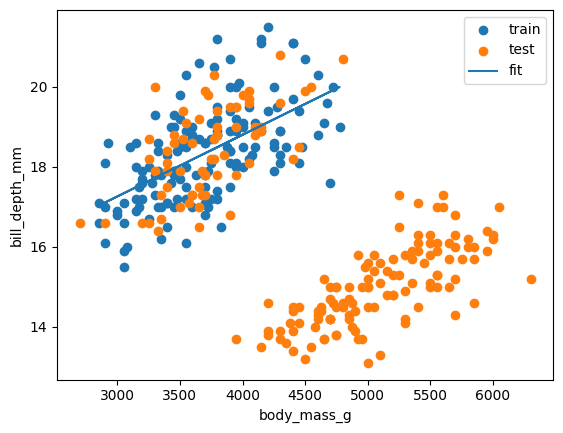

In [22]:
plt.scatter(x_train, y_train, label="train")
plt.scatter(x_test, y_test, label="test")
plt.plot(x_train, y_train_pred, "-", label="fit")
plt.xlabel("body_mass_g")
plt.ylabel("bill_depth_mm")
plt.legend()
plt.show()

Oh dear. It looks like our linear regression fits okay for our subset of the penguin data, and a few additional samples, but there appears to be a cluster of points that are poorly predicted by our model. Even if we re-trained our model using all samples it looks unlikely that our model would perform much better due to the two-cluster nature of our dataset.

> ## This is a classic machine learning scenario known as overffitting
> We have trained our model on a specific set of data, and our model has learned to reproduce those specific answers at the expense of creating a more generally-applicable model.
> Overfitting is the ML equivalent of learning an exam papers mark scheme off by heart, rather than understanding and answering the questions.
> Overfitting is especially prevalent when you have (A) limited data, and/or (B) complicated/large models with lots of trainable parameters (e..g, neural nets).

In this episode we chose to create a regression model for `bill_depth_mm` versus `body_mass_g` predictions without understanding our penguin dataset. While we proved we *can* make a model by doing this we also saw that the model is flawed due to complexity in the data that we did not account for. 

At least two interpretrations of these results:

- Single cluster interpretation: Bill depth decreases with increasing body mass
- Multiple cluster interpretation: Bill depth generally increases with body mass, but with another hidden variable producing somewhat unique distributions/clusters across this axis.

Let's assume for a moment that we only have access to the two variables, body mass and bill depth. In this scenario, we may want a model that captures the global trend of bill depth decreasing with body mass. For this, we need to revisit how we split our data into train/test sets. Sklearn provides a tool to make it easy to split into these subsets using random shuffling of observations.

In [24]:
from sklearn.model_selection import train_test_split
x = dataset['body_mass_g']
y = dataset['bill_depth_mm']

# # sklearn requires a 2D array, so lets reshape our 1D arrays from (N) to (N,).
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Exercise: Try to re-implement our univariate regression model using these new train/test sets.
Follow these steps:

1. Define your estimator model
2. Train the model using .fit()
3. Get predictions from the model using .predict
4. Calculate RMSE for train/test
5. Plot scatter plot of train/test data, with line of best fit

train RMSE = 1.7224074592907486
test RMSE = 1.8034609023788875


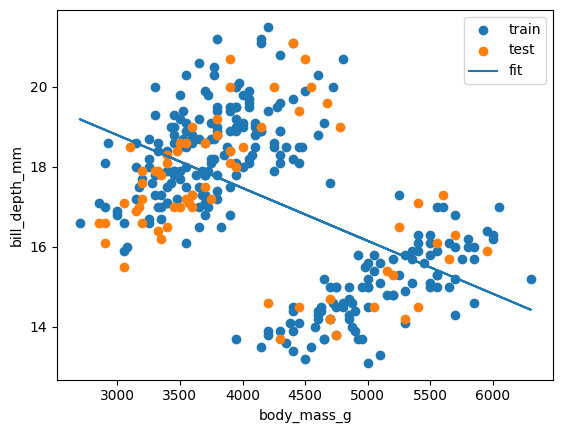

In [26]:
from sklearn.linear_model import LinearRegression

# Define our estimator/model
model = LinearRegression(fit_intercept=True)

# train our estimator/model using our data
lin_regress = model.fit(x_train, y_train)

# get preds and calculated a RMS error for train data
y_train_pred = lin_regress.predict(x_train)
train_error = math.sqrt(mean_squared_error(y_train, y_train_pred))
print("train RMSE =", train_error)

# get preds and calculated a RMS error for test data
y_test_pred = lin_regress.predict(x_test)
test_error = math.sqrt(mean_squared_error(y_test, y_test_pred))
print("test RMSE =", test_error)

# scatter plot
plt.scatter(x_train, y_train, label="train")
plt.scatter(x_test, y_test, label="test")
plt.plot(x_train, y_train_pred, "-", label="fit")
# plt.plot(x_train, y_train_pred, "rx", label="predictions")
plt.xlabel("body_mass_g")
plt.ylabel("bill_depth_mm")
plt.legend()
plt.show()

**Quick follow-up**: Interpret the results of your model. Is it accurate? What does it say about the relationship between body mass and bill depth? Is this a "good" model?

## Repeating the regression with different estimators
Let's repeat the above but this time using a polynomial function to see if we can get a better fit to the data

Polynomial functions are non-linear functions that are commonly-used to model data. Mathematically they have `N` degrees of freedom and they take the following form `y = a + bx + cx^2 + dx^3 ... + mx^N`. If we have a polynomial of degree `N=1` we once again return to a linear equation `y = a + bx` or as it is more commonly written `y = mx + c`.

We'll follow the same workflow from before:
* Decide on a model to use model (also known as an estimator)
* Tweak your data into the required format for your model
* Define and train your model on the input data
* Predict some values using the trained model
* Check the accuracy of the prediction, and visualise the result

We've decided to use a Polynomial estimator, so now let's tweak our dataset into the required format. For polynomial estimators in Scikit-Learn this is done in two steps. First we pre-process our input data `x_train` into a polynomial representation using the `PolynomialFeatures` function. Then we can create our polynomial regressions using the `LinearRegression().fit()` function as before, but this time using the polynomial representation of our `x_train`.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# create a polynomial representation of our training data
poly_features = PolynomialFeatures(degree=3)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

## We convert a non-linear problem into a linear one
By converting our input feature data into a polynomial representation we can now solve our non-linear problem using linear techniques. This is a common occurence in machine learning as linear problems are far easier computationally to solve. We can treat this as just another pre-processing step to manipulate our features into a ML-ready format.

We are now ready to create and train our model using our polynomial feature data.

In [31]:
# Define our estimator/model(s) and train our model
poly_regress = LinearRegression()
poly_regress.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We can now make predictions on train/test sets, and calculate RMSE

In [33]:
# Predictions
y_train_pred = poly_regress.predict(x_train_poly)
y_test_pred = poly_regress.predict(x_test_poly)

poly_train_error = math.sqrt(mean_squared_error(y_train_pred, y_train))
print("poly train error =", poly_train_error)

poly_test_error = math.sqrt(mean_squared_error(y_test_pred, y_test))
print("poly train error =", poly_test_error)

poly train error = 1.5616326860406455
poly train error = 1.639758416136197


Finally, let's visualise our model fit on our training data and full dataset.

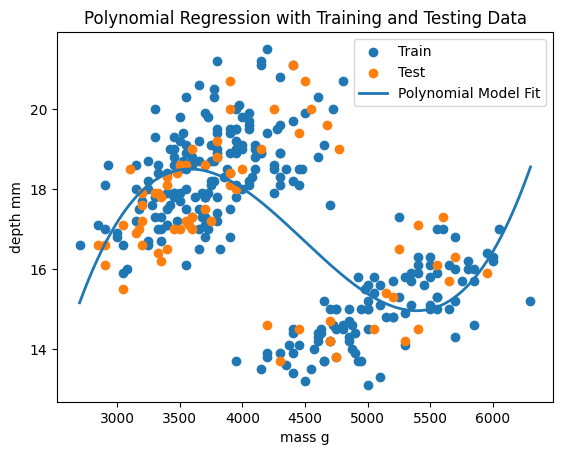

In [35]:
# Scatter plots for train and test data
plt.scatter(x_train, y_train, label='Train')
plt.scatter(x_test, y_test, label='Test')

# Plot the model fit
x_range = np.linspace(min(x), max(x), 500).reshape(-1, 1)
y_range_pred = poly_regress.predict(poly_features.transform(x_range))
plt.plot(x_range, y_range_pred, label='Polynomial Model Fit', linewidth=2)

# Labels and legend
plt.xlabel("mass g")
plt.ylabel("depth mm")
plt.title('Polynomial Regression with Training and Testing Data')
plt.legend()

**Quick follow-up**: Interpret the results of your model. Is it accurate? What does it say about the relationship between body mass and bill depth? Is this a "good" model?

## Exercise: Vary your polynomial degree to try and improve fitting
Adjust the `degree=3` input variable for the `PolynomialFeatures` function to change the degree of polynomial fit. Can you improve the RMSE of your model? 

**Note**: You can use the cells already defined above for this, or practice typing everything out.

## Zooming back out: the importance of EDA
While polynomial regression may help to a degree here, it isn't an ideal solution. Whenever you see multiple distict clusters in your data, you should ask yourself what hidden variable might be causing additional clusters to appear, and move on to exploring multivariable models (models with more than one input feature). When we investigate additional features from our data, we are able to see the larger picture that describes how input variables relate to whatever target variable we are interested in. 

When you are doing any kind of modeling work, it is critical to spend your first few hours/days/weeks simply exploring the data. This means:
- Investigate pairwise relationships between "predictors" (X)
- Investigate correlation between predictors
- Plot distributions of each variable
- Check for outliers
- Check for NaNs

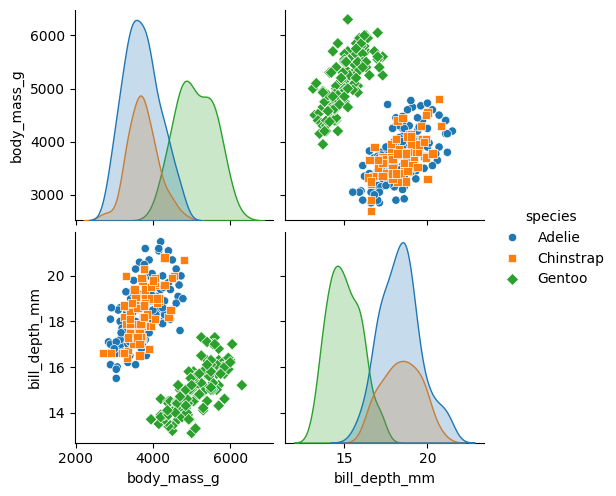

In [39]:
# Create the pairs plot
sns.pairplot(dataset, vars=["body_mass_g", "bill_depth_mm"], hue="species", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the penguins dataset
# (replace this with your own dataset import if needed)
from seaborn import load_dataset
dataset = load_dataset('penguins')

# Drop rows with missing values in relevant columns
dataset = dataset.dropna(subset=['body_mass_g', 'bill_depth_mm', 'species'])

# Define predictors and target
X = dataset[['body_mass_g', 'species']]
y = dataset['bill_depth_mm']
X.head()

,body_mass_g,species
0,3750.0,Adelie
1,3800.0,Adelie
2,3250.0,Adelie
4,3450.0,Adelie
5,3650.0,Adelie


Since the species column is coded as a string, we need to convert it into a numerical format before we can use it in a machine learning model. To do this, we apply dummy coding (also called one-hot encoding), which creates new binary columns for each species category (e.g., species_Adelie, species_Chinstrap, species_Gentoo). Each row gets a 1 in the column that matches its species and 0 in the others.

By default, we drop the first category to avoid multicollinearity—this means the omitted category serves as the reference group when interpreting model coefficients.

In [42]:
# One-hot encode species (drop_first avoids multicollinearity)
X = pd.get_dummies(X, columns=['species'], drop_first=True)
X.head()

,body_mass_g,species_Chinstrap,species_Gentoo
0,3750.0,False,False
1,3800.0,False,False
2,3250.0,False,False
4,3450.0,False,False
5,3650.0,False,False


We can than train/fit and evaluate our model as usual.

In [44]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)
test_error = mean_squared_error(y_test, y_pred)
print(f"RMSE with species as a predictor: {test_error:.2f}")



RMSE with species as a predictor: 0.81


Let's take a look at the model coefs.

In [46]:
# Optional: view learned coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nModel coefficients:")
print(coefficients)


Model coefficients:
body_mass_g          0.001495
species_Chinstrap    0.005965
species_Gentoo      -5.398055
dtype: float64


**Quick follow-up**: Interpret the results of your model. Is it accurate? What does it say about the relationship between body mass and bill depth? Is this a "good" model?